In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import math, time, random, datetime
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection , metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

Grade: Classification of loan on various parameter, credit history , repayment risk     
Loan Amount : EMI     
Inquiries : seriously impact your credit score     
Funded amount : outstanding principal amount of such Lender's Loans.    
A loan becomes delinquent when you make payments late (even by one day) or miss a regular installment payment or payments.  
revolving balance :If you don't pay the balance on your revolving credit account in full every month, the unpaid portion carries over to the next month        
Dataset contains all non-null values.  

In [4]:
train['Term'].value_counts()

59    43780
58    22226
36     1457
Name: Term, dtype: int64

<AxesSubplot:xlabel='Term', ylabel='count'>

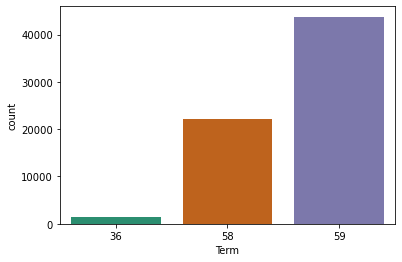

In [5]:
sns.countplot(data = train, x = 'Term', palette='Dark2')

59 has maximum term i.e 8.25 years and 3 yrs is minimum term.

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
Funded Amount Investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
Debit to Income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
Delinquency - two years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

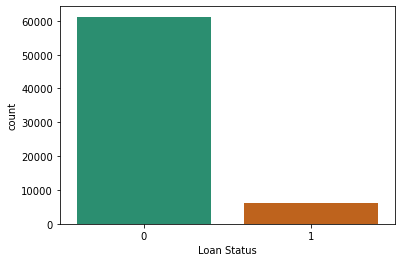

In [7]:
sns.countplot(data = train, x = 'Loan Status', palette='Dark2')

In [8]:
train['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [9]:
train['Employment Duration'].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [10]:
train['Employment Duration'].str.contains('OWN').sum()

6962

36351 contains Mortgage , 24150 contains Rent , 6962 contains OWN loan type.    
Home Ownership has each different values ranging from 406561.53 to 14573.53.

<AxesSubplot:xlabel='Delinquency - two years', ylabel='count'>

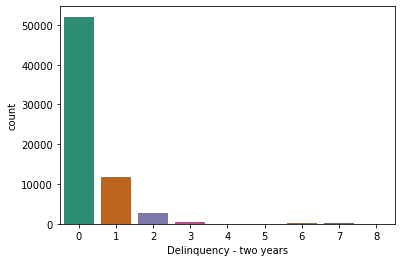

In [11]:
sns.countplot(data = train, x = 'Delinquency - two years', palette='Dark2')

<AxesSubplot:xlabel='Loan Amount', ylabel='Revolving Balance'>

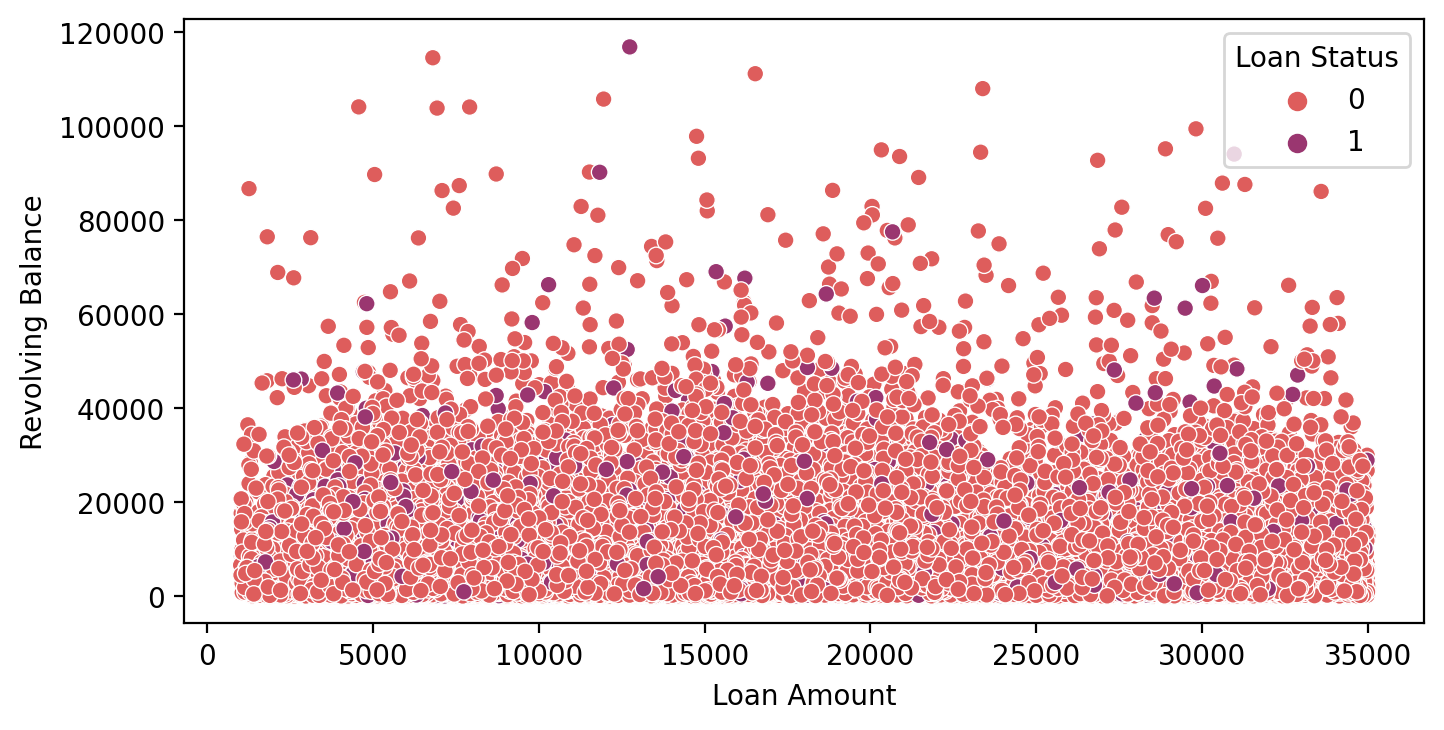

In [12]:
plt.figure(figsize=(8,4) , dpi = 200)
sns.scatterplot(data = train , y = 'Revolving Balance' , x = 'Loan Amount' , hue = 'Loan Status' ,palette='flare')

<AxesSubplot:xlabel='Total Collection Amount', ylabel='Total Revolving Credit Limit'>

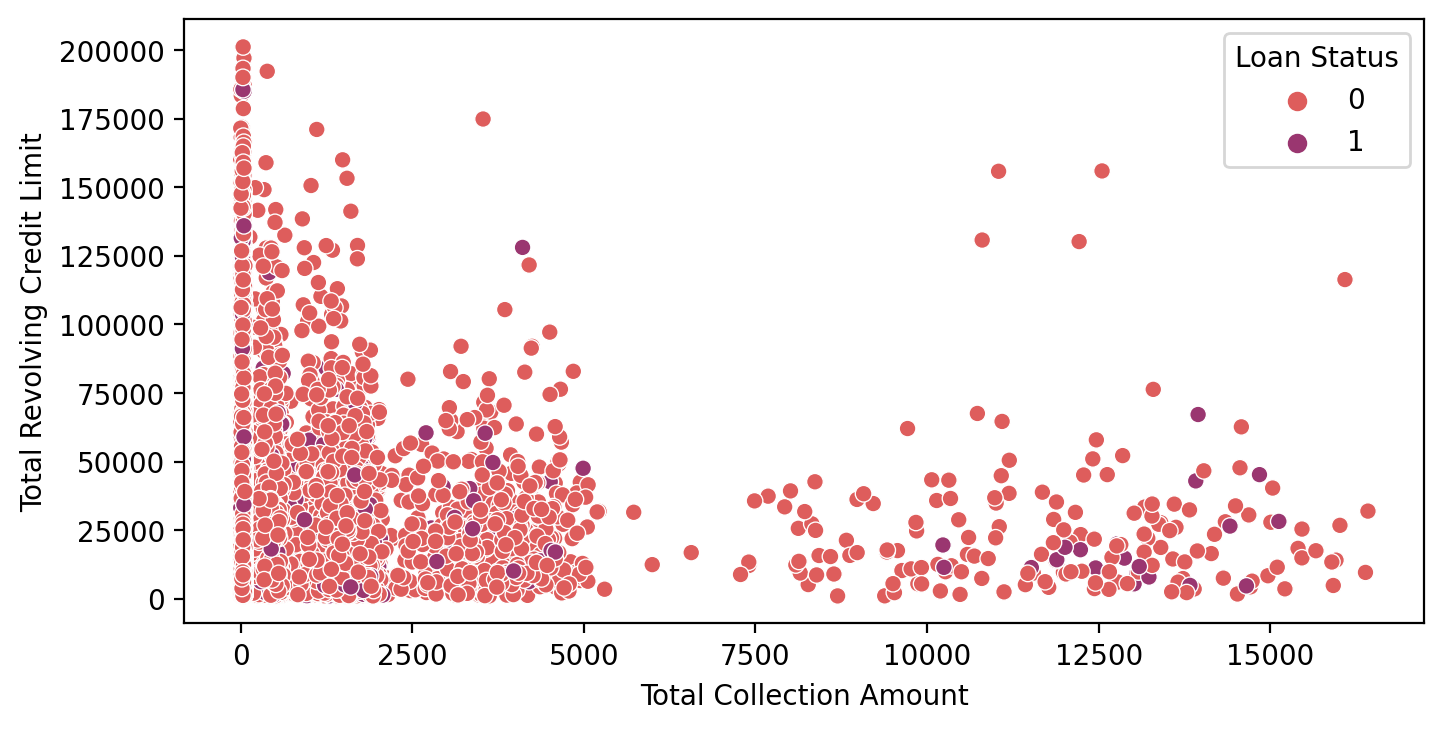

In [13]:
plt.figure(figsize=(8,4) , dpi = 200)
sns.scatterplot(data = train , x = 'Total Collection Amount' , y = 'Total Revolving Credit Limit' , hue = 'Loan Status' ,palette='flare')

<AxesSubplot:xlabel='Loan Status', ylabel='Funded Amount'>

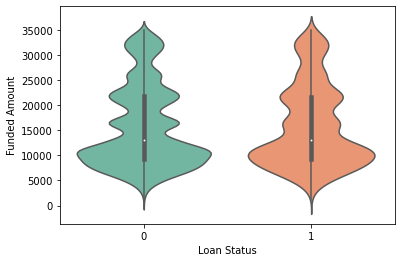

In [14]:
sns.violinplot(data=train, y='Funded Amount', x='Loan Status', palette='Set2')

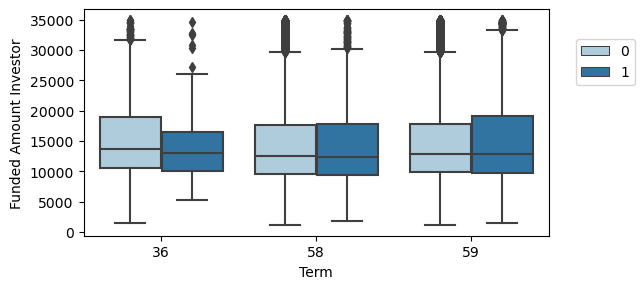

In [15]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(data=train, y='Funded Amount Investor' , x= 'Term' , hue= 'Loan Status' , palette='Paired')
plt.legend(bbox_to_anchor=(1.2,0.9))

Model Evaluation

In [16]:
leak_cols = ['ID','Funded Amount', 'Funded Amount Investor','Batch Enrolled','Collection Recovery Fee','Collection 12 months Medical','Home Ownership','Total Collection Amount',
       'Total Current Balance','Payment Plan','Loan Title','Last week Pay','Initial List Status','Initial List Status',
            'Total Received Interest','Total Received Late Fee','Recoveries', 'Collection Recovery Fee','Collection 12 months Medical','Accounts Delinquent']

In [17]:
train_d = train.drop(columns=leak_cols, axis=1)
drop_col_count = len(leak_cols)
print("The new dataframe has {} columns and lost {} after dropping future leaks".format(train_d.shape[1],
                                                                           drop_col_count))

test_d = test.drop(columns=leak_cols, axis=1)
drop_col_count = len(leak_cols)
print("The new dataframe has {} columns and lost {} after dropping future leaks".format(test_d.shape[1],
                                                                           drop_col_count))

The new dataframe has 18 columns and lost 20 after dropping future leaks
The new dataframe has 18 columns and lost 20 after dropping future leaks


In [18]:
def df_object_to_num(df_obj):
        
    df_num = df_obj.copy()
    
    #keep track of columns to drop at end 'Application Type'
    col_drop_list = []

    # pub_rec
    df_num['Public Record'] = np.where(df_num['Public Record']>0, 1, 0)
    
     ### instantiate dicts ### 
   
    grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
    #copied from above, we can write a function to generate this dict
    sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}
    
    Employment_Duration_to_int = {'MORTGAGE': 2, 'RENT': 1, 'OWN': 0 }
    Application_Type_to_int = {'INDIVIDUAL': 1,  'JOINT': 2}
    Verification_Status_to_int = {'Source Verified':2,'Verified': 1,'Not Verified': 0} 
    #replacements
    df_num.replace({'Grade':grade_to_int,'Sub Grade': sub_grade_sorted, 'Employment Duration':Employment_Duration_to_int ,'Application Type':Application_Type_to_int, 'Verification Status':Verification_Status_to_int}, inplace=True)

    #drop nans in case we missed any
    #df_num = df_num.dropna(axis=0)

    # credit_line_ratio 
    df_num['credit_line_ratio']=df_num['Open Account']/df_num['Total Accounts']
    
    col_drop_list.append('Open Account')
    col_drop_list.append('Total Accounts')
   
    df_num  = df_num.drop(columns=col_drop_list)
    
    return df_num

In [19]:
df_num = df_object_to_num(train_d)
df_num.head()

df_test = df_object_to_num(test_d)
df_test.head(2)
#df_num.head(2)

,Loan Amount,Term,Interest Rate,Grade,Sub Grade,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Public Record,Revolving Balance,Revolving Utilities,Application Type,Total Revolving Credit Limit,Loan Status,credit_line_ratio
0,17120,59,12.163926,7,19,1,2,16.749219,1,0,1,3576,67.278287,1,4364,NaN,2.40000
1,7133,59,6.564296,6,12,2,2,18.157975,0,0,0,1932,71.313157,1,2573,NaN,0.52381


In [20]:
# separating the data and label
X_train = df_num.drop(columns=['Loan Status'],axis=1)
Y_train = df_num['Loan Status']

X_test = df_test.drop(columns=['Loan Status'],axis=1)
Y_test = df_test['Loan Status']


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
pds = scaler.fit_transform(X_train)
pds.shape
std_train = pd.DataFrame(pds)
train_data=std_train.rename(columns={0:'Loan Amount',1:'Term',2:'Interest Rate',3:'Grade',4:'Sub Grade',5:'Employment Duration',6:'Verification Status',7:'Debit to Income',8:'Delinquency - two years',9:'Inquires - six months',10:'Public Record',11:'Revolving Balance',12:'Revolving Utilities',13:'Application Type',14:'Total Revolving Credit Limit',15:'credit_line_ratio'})

#test data
pdtest = scaler.fit_transform(X_test)
pdtest.shape
std_test = pd.DataFrame(pdtest)
test_data=std_test.rename(columns={0:'Loan Amount',1:'Term',2:'Interest Rate',3:'Grade',4:'Sub Grade',5:'Employment Duration',6:'Verification Status',7:'Debit to Income',8:'Delinquency - two years',9:'Inquires - six months',10:'Public Record',11:'Revolving Balance',12:'Revolving Utilities',13:'Application Type',14:'Total Revolving Credit Limit',15:'credit_line_ratio'})

In [23]:
train_data.head(2)

,Loan Amount,Term,Interest Rate,Grade,Sub Grade,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Public Record,Revolving Balance,Revolving Utilities,Application Type,Total Revolving Credit Limit,credit_line_ratio
0,-0.818483,0.248297,-0.191268,0.589775,-0.140040,0.839214,-1.522917,-0.829943,0.840164,-0.307961,-0.270256,2.111596,0.977986,-0.042738,-0.789041,1.100957
1,-1.582243,0.248297,0.105229,-0.133380,-0.680215,-0.647783,0.918926,-0.933158,-0.408459,-0.307961,-0.270256,-0.878926,1.127265,-0.042738,-0.106997,-0.077043


In [24]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, train_data, Y_train, cv):
    
    # One Pass
    model = algo.fit(train_data, Y_train)
    acc = round(model.score(train_data, Y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  train_data, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [25]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               train_data, 
                                                               Y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 90.75
Accuracy CV 10-Fold: 90.75
Running Time: 0:00:13.681668


In [26]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                train_data, 
                                                                Y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 81.86
Running Time: 0:00:06.761433


In [27]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       train_data, 
                                                                       Y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 90.77
Accuracy CV 10-Fold: 90.74
Running Time: 0:01:11.635030


In [28]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      train_data, 
                                                                      Y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 88.33
Accuracy CV 10-Fold: 88.38
Running Time: 0:00:00.481867


In [29]:
#Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  train_data, 
                                                  Y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 90.75
Accuracy CV 10-Fold: 90.75
Running Time: 0:00:01.319774


In [30]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Gradient Boosting Trees','Naive Bayes','Stochastic Gradient Decent'],
    'Score': [acc_log,acc_dt,acc_gbt,acc_gaussian,acc_sgd]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Regular Accuracy Scores---


,Model,Score
1,Decision Tree,100.00
2,Gradient Boosting Trees,90.77
0,Logistic Regression,90.75
4,Stochastic Gradient Decent,90.75
3,Naive Bayes,88.33


In [31]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Gradient Boosting Trees','Naive Bayes','Stochastic Gradient Decent'],
    'Score': [acc_cv_log,acc_cv_dt,acc_cv_gbt,acc_cv_gaussian,acc_cv_sgd]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
0,Logistic Regression,90.75
4,Stochastic Gradient Decent,90.75
2,Gradient Boosting Trees,90.74
3,Naive Bayes,88.38
1,Decision Tree,81.86


We can see Logistic Regression had the best results. 

In [32]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(train_data, Y_train)

LogisticRegression(max_iter=500, random_state=1, solver='saga')

In [33]:
importance = LRclassifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.01356
Feature: 1, Score: -0.01099
Feature: 2, Score: 0.00830
Feature: 3, Score: -0.03547
Feature: 4, Score: -0.01094
Feature: 5, Score: -0.05074
Feature: 6, Score: 0.00960
Feature: 7, Score: -0.00908
Feature: 8, Score: 0.03160
Feature: 9, Score: 0.00061
Feature: 10, Score: 0.02760
Feature: 11, Score: -0.00611
Feature: 12, Score: 0.01508
Feature: 13, Score: -0.00225
Feature: 14, Score: 0.00326
Feature: 15, Score: 0.01537


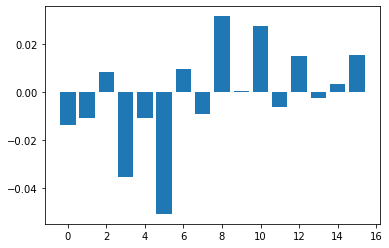

In [34]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [35]:
y_pred = LRclassifier.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
acc = round(LRclassifier.score(train_data, Y_train) * 100, 2)

In [38]:
acc

90.75

In [39]:
submission = pd.DataFrame(y_pred)

In [40]:
submission.to_csv('submission.csv')